# **Explorando as Taxas de Consumo de Álcool por Estudantes**

## Projeto da Disciplina **"Análise de Dados"** - Pós-graduação em Visão Computacional - CIn-UFPE.

 ### Aluno: Daniel Macedo

## **Introdução** 

![imagem](https://ichef.bbci.co.uk/news/800/cpsprodpb/8804/production/_119402843_gettyimages-184137051.jpg)

Imagem por Getty Images, em [BBC News](https://www.bbc.com/portuguese/geral-57853174).

O consumo de álcool por parte dos jovens é atualmente considerado um problema em decorrência das implicações que o mesmo pode ter no rendimento escolar dos alunos. Dessa forma, os datasets escolhidos fornecem informações de estudantes do que seria o ensino médio em escolas de Portugal que buscaram ênfase nas áreas de exatas ou línguas. Os mesmos foram recolhidos no Kaggle no link (https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv) e a análise aqui descrita busca avaliar os efeitos nas notas dos aluno e os efeitos de alguns atributos no consumo de álcool.

## **Da importação das Bibliotecas**

As bibliotecas a serem utilizadas no projeto foram importadas e seguem abaixo

In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Os Dados**

A análise inicia-se por meio da importação dos arquivos com os datasets escolhidos.

In [180]:
mat_stud = pd.read_csv('student-mat.csv')
por_stud = pd.read_csv('student-por.csv')

## **Análise Inicial Para os Alunos de Exatas**

In [181]:
mat_stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [182]:
mat_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Pode-se notar que o dataset possui diversos atributros que podem ser utilizados. No entanto, certas informações são conhecidas por serem mais relevantes no que concerne ao comportamento de jovens e estas serão analisadas.

## **Pré-Processamento**

Para este trabalho, serão considerados apenas alguns fatores considerados preponderantes para analisarmos o perfil de consumo de álcool dos estudantes, tanto dos campos da matemática como do português. Isso se dá pelo fato de que os mesmos são tidos como bastante influentes no comportamento de jovens e seu perfil pessoal e educacional. Serão eles a serem tratados:
1. sex: Sexo (F - M) - cat
2. age: Idade (15 - 22)
3. Pstatus: Estado civil dos pais (T - Juntos; A - Separados) - cat
4. studytime: Tempo dedicado aos estudos semanalmente (1 - < 2 horas, 2 - 2 to 5 horas, 3 - 5 to 10 horas, or 4 - >10 horas)
5. failures: Número de reprovações (1 - 4) - cat
6. activities: Atividades extra-curriculares (yes / no) - bool
7. higher: Pretensão de cursar ensino superior (yes / no) - bool
8. internet: Acesso à internet (yes / no) - bool
9. famrel: Qualidade do relacionamento familiar (1 - muito ruim; 5 - muito bom) 
10. freetime: Tempo livre após a escola (1 - muito ruim; 5 - muito bom)
11. Dalc: Consumo diário de álcool (seg-sex) (1 - quase nenhum; 5 - muito elevado) - cat
12. Walc: Consumo de álcool aos finais de semana (1 - quase nenhum; 5 - muito elevado) - cat
13. G1, G2, G3: Notas dos períodos. (0 - 20)

As demais colunas com os demais fatores, por apresentarem uma relevância menor (o que não indica que seja inexistente), serão *dropadas* para fins de análise **neste** estudo.

In [183]:
mat_stud = mat_stud.drop(['school','address','famsize','Medu','Fedu',\
                          'Mjob','Fjob','reason','guardian','traveltime',\
                          'schoolsup','famsup','paid','nursery','romantic',\
                          'goout','health','absences'],axis=1)

In [184]:
mat_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   Pstatus     395 non-null    object
 3   studytime   395 non-null    int64 
 4   failures    395 non-null    int64 
 5   activities  395 non-null    object
 6   higher      395 non-null    object
 7   internet    395 non-null    object
 8   famrel      395 non-null    int64 
 9   freetime    395 non-null    int64 
 10  Dalc        395 non-null    int64 
 11  Walc        395 non-null    int64 
 12  G1          395 non-null    int64 
 13  G2          395 non-null    int64 
 14  G3          395 non-null    int64 
dtypes: int64(10), object(5)
memory usage: 46.4+ KB


In [185]:
mat_stud.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,G1,G2,G3
0,F,18,A,2,0,no,yes,no,4,3,1,1,5,6,6
1,F,17,T,2,0,no,yes,yes,5,3,1,1,5,5,6
2,F,15,T,2,3,no,yes,yes,4,3,2,3,7,8,10
3,F,15,T,3,0,yes,yes,yes,3,2,1,1,15,14,15
4,F,16,T,2,0,no,yes,no,4,3,1,2,6,10,10


## **Ajustando Dados**

Nesta seção, serão tratadas as informações para que se verifique a existência de dados duplicados e/ou ausentes e, assim, possa ser feito o tratamento (caso haja necessidade) por meio de imputação de outros valores atráves de média ou mediana, ou outro fator que venha a ser conveniente a depender do cenário. 

Abaixo tem-se a conversão dos tipos de atributos para categóricos, *booleanos* e numéricos (quando necessário).

In [186]:
# Retorna os valores como Verdadeiro ou Falso
def convert(item):
    if item == 'yes':
        return True
    elif item == 'no':
        return False

# Retorna os valores numéricos como textuais para facilitar a compreesão
def adjust(item):
    if item == 1:
        return 'Muito Baixo'
    elif item == 2:
        return 'Baixo'
    elif item == 3:
        return 'Médio'
    elif item == 4:
        return 'Elevado'
    elif item == 5:
        return 'Muito Elevado'

def adjustFamily(item):
    if item == 1:
        return 'Muito Ruim'
    elif item == 2:
        return 'Ruim'
    elif item == 3:
        return 'Normal'
    elif item == 4:
        return 'Bom'
    elif item == 5:
        return 'Muito Bom'

In [187]:
# Conversão dos atributos e aplicação de função para modificação dos valores.

mat_stud['sex'] = mat_stud['sex'].astype('category')
mat_stud['Pstatus'] = mat_stud['Pstatus'].astype('category')
mat_stud['Dalc'] = mat_stud['Dalc'].apply(adjust)
mat_stud['Walc'] = mat_stud['Walc'].apply(adjust)
mat_stud['activities'] = mat_stud['activities'].apply(convert)
mat_stud['higher'] = mat_stud['higher'].apply(convert)
mat_stud['internet'] = mat_stud['internet'].apply(convert)
mat_stud['famrel'] = mat_stud['famrel'].apply(adjustFamily)
mat_stud['studytime'] = mat_stud['studytime'].apply(adjust)
mat_stud['freetime'] = mat_stud['freetime'].apply(adjust)

In [188]:
# Conversão dos Atributos

mat_stud['Dalc'] = mat_stud['Dalc'].astype('category')
mat_stud['Walc'] = mat_stud['Walc'].astype('category')
mat_stud['famrel'] = mat_stud['famrel'].astype('category')
mat_stud['studytime'] = mat_stud['studytime'].astype('category')
mat_stud['freetime'] = mat_stud['freetime'].astype('category')

In [189]:
# Observação das Categorias
mat_stud.dtypes

sex           category
age              int64
Pstatus       category
studytime     category
failures         int64
activities        bool
higher            bool
internet          bool
famrel        category
freetime      category
Dalc          category
Walc          category
G1               int64
G2               int64
G3               int64
dtype: object

In [190]:
mat_stud.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,G1,G2,G3
0,F,18,A,Baixo,0,False,True,False,Bom,Médio,Muito Baixo,Muito Baixo,5,6,6
1,F,17,T,Baixo,0,False,True,True,Muito Bom,Médio,Muito Baixo,Muito Baixo,5,5,6
2,F,15,T,Baixo,3,False,True,True,Bom,Médio,Baixo,Médio,7,8,10
3,F,15,T,Médio,0,True,True,True,Normal,Baixo,Muito Baixo,Muito Baixo,15,14,15
4,F,16,T,Baixo,0,False,True,False,Bom,Médio,Muito Baixo,Baixo,6,10,10


#### **Considerações**

Abaixo temos as categorias para os alunos com consumo diário (segunda a sexta) de bebidas de teor alcoólico. 
Entenda-se: 
- **Dalc**: **Consumo Diário (seg -  sex)**
- **Walc**: **Consumo aos finais de semana**

Para este estudo, será priorizada a análise para o consumo diário, dado que seus efeitos são considerados mais severos.

In [191]:
#Categorias de consumo diário

mat_stud['Dalc'].cat.categories

Index(['Baixo', 'Elevado', 'Muito Baixo', 'Muito Elevado', 'Médio'], dtype='object')

In [192]:
# Tamanho do dataset

mat_stud.shape

(395, 15)

##### **Da existência de Dados Nulos**

Averiguar-se-á a existência de elementos nulos. Caso existam, pode-se aplicar a função dropna() no dataset. A depender da quantidade, podemos remover colunas com menos 65% dos dados presentes. (thresh=0.65*len(mat_stud), axis=1). Essa consideração é feita pois com menos valores presentes de informações tidas como importantes pode afetar a análise dos dados.

In [193]:
print(mat_stud.isnull().sum())

sex           0
age           0
Pstatus       0
studytime     0
failures      0
activities    0
higher        0
internet      0
famrel        0
freetime      0
Dalc          0
Walc          0
G1            0
G2            0
G3            0
dtype: int64


Como não houve ocorrência de dados nulos, pode-se tomar as colunas como estão.

Dessa forma, também não se vê a necessidade de realizar a imputação de valores, seja por meio da média, mediana ou moda variável no dataset. 

##### **Da existência de Dados Duplicados**

Caso hajam dados duplicados, os mesmos poderão ser removidos para que não prejudiquem a análise dos dados.

In [194]:
# averiguando existência de dados duplicados
len(mat_stud.duplicated() == False)

395

Como observado, o dataset escolhido veio "*limpo*", o que facilita a análise, mas caso houvesse necessidade bastaria que, a depender da influência dos valores, os mesmos fossem removidos.

### **Normalização e Discretização**

A seguir, teremos algumas análises estatísticas para averiguar efeitos (caso sejam necessários) de normalização e discretização, bem como a limpeza (*caso exista a necessidade*) de forma univariada ou bivariada.

A princípio será feita uma adição de uma coluna **média** no dataset. Dessa forma, pode-se ter uma melhor noção da influência dos demais atributos nas notas dos alunos e também pode-se "*enxugar*" a tabela ao remover-se as notas individuais.

In [195]:
# adicionando uma coluna 'média' ao dataset para facilitar visualização de notas
mat_stud['media'] = round((mat_stud['G1'] + mat_stud['G2'] + mat_stud['G3'])/3, 2)

In [196]:
# Observação das médias no dataset
mat_stud['media'].describe()

count    395.000000
mean      10.679139
std        3.696912
min        1.330000
25%        8.330000
50%       10.670000
75%       13.330000
max       19.330000
Name: media, dtype: float64

In [197]:
# "Drop" das notas individuais
mat_stud = mat_stud.drop(['G1','G2','G3'],axis=1)

In [198]:
# Observando a idade dos estudantes
mat_stud['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [200]:
# Analisando o percentual do sexo dos Estudantes
mat_stud['sex'].value_counts() / mat_stud.shape[0]

F    0.526582
M    0.473418
Name: sex, dtype: float64

In [ ]:

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
mat_stud.hist(ax = ax)
plt.show()

## **Análise Exploratória e Observação dos Dados**

In [105]:
# adicionando uma coluna 'média' ao dataset para facilitar visualização de notas
mat_stud['media'] = round((mat_stud['G1'] + mat_stud['G2'] + mat_stud['G3'])/3, 2)

In [175]:
mat_stud['media'].describe()

count    395.000000
mean      10.679139
std        3.696912
min        1.330000
25%        8.330000
50%       10.670000
75%       13.330000
max       19.330000
Name: media, dtype: float64

In [176]:
mat_stud = mat_stud.drop(['G1','G2','G3'],axis=1)

In [107]:
# Observando a idade dos estudantes
mat_stud['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [90]:
# Analisando o sexo dos Estudantes
mat_stud['sex'].value_counts() / mat_stud.shape[0]

F    0.526582
M    0.473418
Name: sex, dtype: float64

<ipython-input-108-6e8efc769b10>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  mat_stud.hist(ax = ax)


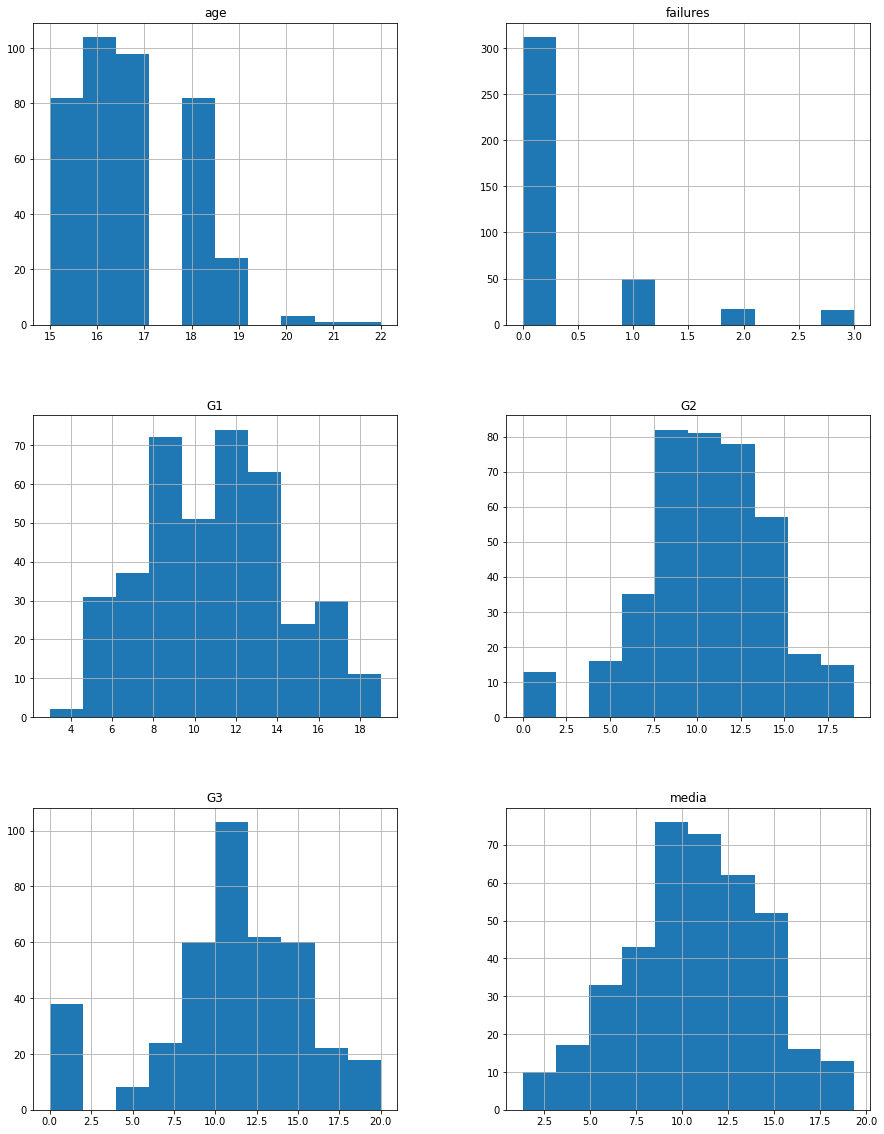

In [108]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
mat_stud.hist(ax = ax)
plt.show()

#### Seleção de Atributos

Para a análise, serão avaliados como os hábitos dos estudantes de consumo elevado e muito elevado de álcool diariamente influenciam a média de suas notas e se esses consumos são influenciados por outros fatores.

A princípio, um novo dataset com esses estudantes será selecionado.

In [109]:
# Observando o consumo de álcool dos estudantes
mat_stud['Dalc'].value_counts()

Muito Baixo      276
Baixo             75
Médio             26
Elevado            9
Muito Elevado      9
Name: Dalc, dtype: int64

Text(0, 0.5, 'Estudantes')

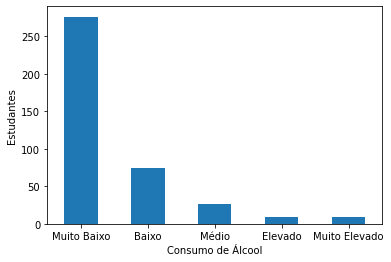

In [110]:
#Verificação visual do consumo de álcool por estudantes durante a semana

counts = mat_stud['Dalc'].value_counts()
counts.plot.bar(rot=0)
plt.xlabel("Consumo de Álcool")
plt.ylabel("Estudantes")

In [111]:
mat_stud['Walc'].value_counts()

Muito Baixo      151
Baixo             85
Médio             80
Elevado           51
Muito Elevado     28
Name: Walc, dtype: int64

Text(0, 0.5, 'Estudantes')

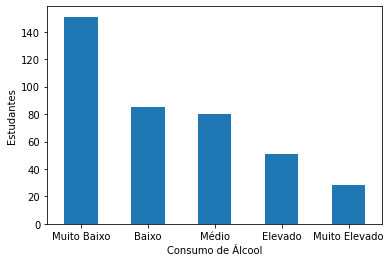

In [112]:
#Verificação visual do consumo de álcool por estudantes durante a semana

wcounts = mat_stud['Walc'].value_counts()
wcounts.plot.bar(rot=0)
plt.xlabel("Consumo de Álcool")
plt.ylabel("Estudantes")

In [113]:
# Seleção dos estudantes

mat_stud_s_notas = mat_stud.drop(['G1','G2','G3'],axis=1)
amostra_mat = mat_stud_s_notas.loc[(mat_stud['Dalc'] == 'Muito Elevado') | (mat_stud['Dalc'] == 'Elevado')]
amostra_s_mat = mat_stud_s_notas.loc[(mat_stud['Dalc'] == 'Médio') | (mat_stud['Dalc'] == 'Baixo') | (mat_stud['Dalc'] == 'Muito Baixo')]

In [135]:
amostra_mat.describe()

,age,failures,media
count,18.000000,18.000000,18.000000
mean,17.277778,0.444444,10.221111
std,1.708303,0.855585,2.401281
min,15.000000,0.000000,5.330000
25%,16.000000,0.000000,9.000000
50%,17.000000,0.000000,10.665000
75%,18.000000,0.750000,12.330000
max,22.000000,3.000000,13.330000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'failures'}>],
       [<AxesSubplot:title={'center':'media'}>, <AxesSubplot:>]],
      dtype=object)

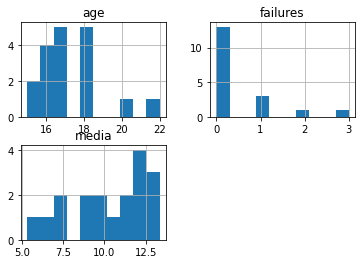

In [136]:
amostra_mat.hist()

In [134]:
amostra_mat.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,media
29,M,16,T,Baixo,0,True,True,True,Bom,Elevado,Muito Elevado,Muito Elevado,11.00
54,F,15,A,Muito Baixo,0,False,True,True,Muito Bom,Médio,Elevado,Elevado,12.00
61,F,16,T,Muito Baixo,0,True,True,True,Muito Bom,Muito Elevado,Muito Elevado,Muito Elevado,9.67
66,M,15,A,Elevado,0,True,True,True,Muito Ruim,Médio,Muito Elevado,Muito Elevado,12.67
100,M,16,T,Muito Baixo,0,True,True,True,Bom,Muito Elevado,Muito Elevado,Muito Elevado,6.33


In [115]:
amostra_s_mat.describe()

,age,failures,media
count,377.000000,377.000000,377.000000
mean,16.668435,0.328912,10.701008
std,1.247928,0.738772,3.748361
min,15.000000,0.000000,1.330000
25%,16.000000,0.000000,8.330000
50%,17.000000,0.000000,10.670000
75%,18.000000,0.000000,13.330000
max,21.000000,3.000000,19.330000


C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


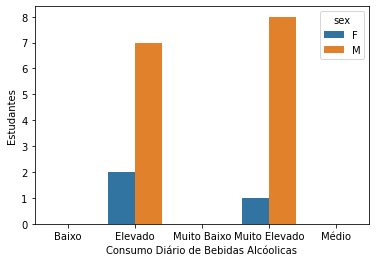

In [126]:
sns.countplot(amostra_mat['Dalc'],hue = amostra_mat['sex'])
plt.xlabel('Consumo Diário de Bebidas Alcóolicas')
plt.ylabel('Estudantes')
plt.show()

In [132]:
# Médias de idade e notas dos consumidores assíduos
amostra_mat.groupby('Dalc').agg({'age':'mean','media':'mean'}).dropna()

,age,media
Dalc,,
Elevado,17.333333,9.813333
Muito Elevado,17.222222,10.628889


In [28]:
# Percentual de estudantes com consumos elevados

pct_mat = amostra_mat

<ipython-input-118-920cd3d2b3dc>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  amostra_mat.hist(ax = ax)


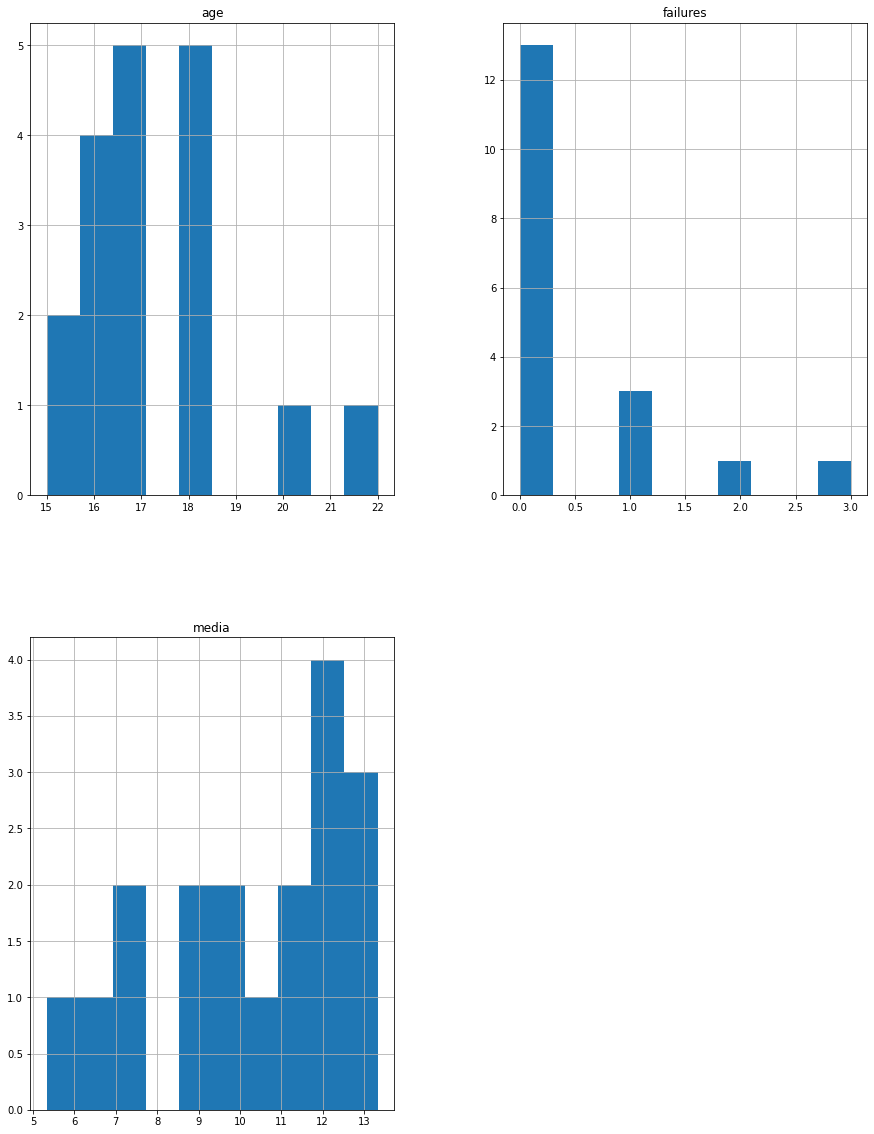

In [118]:
# Histograma dos dados para este conjunto
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
amostra_mat.hist(ax = ax)
plt.show()

#### Comparativo de todos os atributos

Comparação de dados de consumo entre todos os estudantes

In [130]:
# Médias de idade e nptas de consumo
mat_stud.groupby('Dalc').agg({'age':'mean','media':'mean'})

,age,media
Dalc,,
Baixo,16.706667,9.858000
Elevado,17.333333,9.813333
Muito Baixo,16.615942,10.945362
Muito Elevado,17.222222,10.628889
Médio,17.115385,10.538846


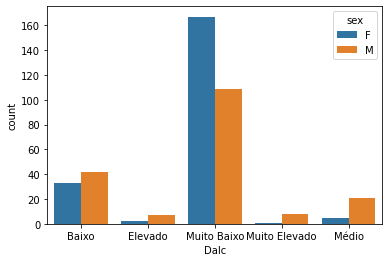

In [71]:
sns.countplot(mat_stud['Dalc'],hue = mat_stud['sex'])
plt.show()

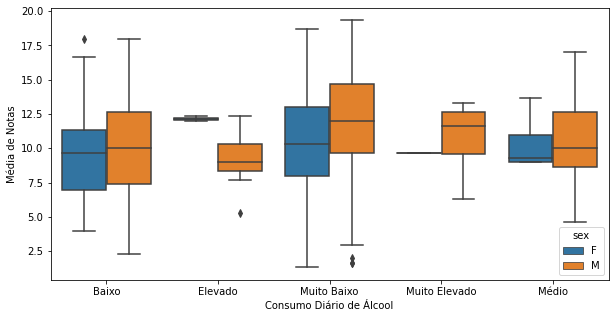

In [124]:
plt.figure(figsize=(10,5))
sns.boxplot(x=mat_stud['Dalc'], y=mat_stud['media'], hue=mat_stud['sex'])
plt.xlabel('Consumo Diário de Álcool')
plt.ylabel('Média de Notas')
plt.show()

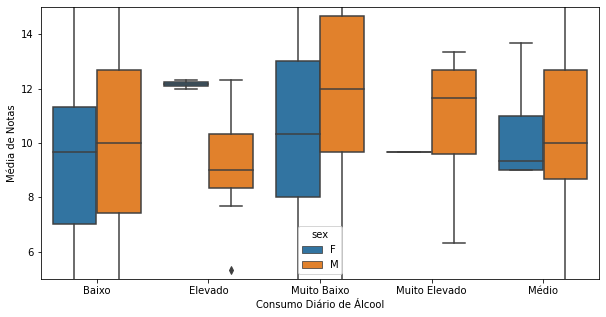

In [125]:
plt.figure(figsize=(10,5))
sns.boxplot(x=mat_stud['Dalc'], y=mat_stud['media'], hue=mat_stud['sex'])
plt.xlabel('Consumo Diário de Álcool')
plt.ylabel('Média de Notas')
plt.ylim(5,15)
plt.show()

In [119]:
mat_stud.describe()

,age,failures,G1,G2,G3,media
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,0.334177,10.908861,10.713924,10.415190,10.679139
std,1.276043,0.743651,3.319195,3.761505,4.581443,3.696912
min,15.000000,0.000000,3.000000,0.000000,0.000000,1.330000
25%,16.000000,0.000000,8.000000,9.000000,8.000000,8.330000
50%,17.000000,0.000000,11.000000,11.000000,11.000000,10.670000
75%,18.000000,0.000000,13.000000,13.000000,14.000000,13.330000
max,22.000000,3.000000,19.000000,19.000000,20.000000,19.330000


In [120]:
# dados de estudantes com consumo elevado de álcool
mat_stud[mat_stud['Walc'] == 'Elevado'].head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,G1,G2,G3,media
18,M,17,T,Muito Baixo,3,True,True,True,Muito Bom,Muito Elevado,Baixo,Elevado,6,5,5,5.33
23,M,16,T,Baixo,0,True,True,True,Muito Bom,Elevado,Baixo,Elevado,13,13,12,12.67
27,M,15,T,Muito Baixo,0,False,True,True,Ruim,Baixo,Baixo,Elevado,15,16,15,15.33
30,M,15,T,Baixo,0,False,True,True,Muito Bom,Elevado,Médio,Elevado,9,11,12,10.67
41,M,15,T,Muito Baixo,0,False,True,True,Muito Bom,Elevado,Baixo,Elevado,12,12,12,12.00


In [54]:
# Avaliando relação de consumo diária com tipo de união parental
mat_stud[mat_stud['Dalc'] == 'Muito Elevado']['Pstatus'].value_counts()

T    8
A    1
Name: Pstatus, dtype: int64

In [122]:
# média de idade dos estudantes que consomem álcool diariamente com valores elevados e muito elevados
melev = mat_stud[mat_stud['Dalc'] == 'Muito Elevado']['age'].mean()
elev = mat_stud[mat_stud['Dalc'] == 'Elevado']['age'].mean()

mediaConsD = round((melev + elev)/2,2)
mediaConsD

17.28

In [121]:
mat_stud[mat_stud['Dalc'] == 'Muito Elevado'].describe()

,age,failures,G1,G2,G3,media
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,17.222222,0.444444,10.444444,10.777778,10.666667,10.628889
std,2.048034,1.013794,2.603417,2.538591,2.692582,2.475674
min,15.000000,0.000000,6.000000,7.000000,5.000000,6.330000
25%,16.000000,0.000000,10.000000,8.000000,10.000000,9.670000
50%,17.000000,0.000000,11.000000,12.000000,11.000000,11.000000
75%,18.000000,0.000000,12.000000,13.000000,13.000000,12.670000
max,22.000000,3.000000,14.000000,13.000000,13.000000,13.330000


In [123]:
mat_stud_s_notas = mat_stud.drop(['G1','G2','G3'],axis=1)
mat_stud_s_notas.corr()

,age,failures,activities,higher,internet,media
age,1.000000,0.243665,-0.103063,-0.209081,-0.112094,-0.134566
failures,0.243665,1.000000,-0.069341,-0.300316,-0.063451,-0.375702
activities,-0.103063,-0.069341,1.000000,0.096484,0.048663,0.040808
higher,-0.209081,-0.300316,0.096484,1.000000,0.020374,0.189434
internet,-0.112094,-0.063451,0.048663,0.020374,1.000000,0.102565
media,-0.134566,-0.375702,0.040808,0.189434,0.102565,1.000000


selecionar dados elevado e muito elevado

In [95]:
amostra = mat_stud.loc[(mat_stud['Dalc'] == 'Muito Elevado') | (mat_stud['Dalc'] == 'Elevado')]
amostra.describe()

,age,studytime,famrel,freetime,G1,G2,G3,media
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,17.277778,1.722222,3.944444,3.888889,10.111111,10.277778,10.277778,10.221111
std,1.708303,0.751904,1.109967,0.900254,2.446820,2.562296,2.607806,2.401281
min,15.000000,1.000000,1.000000,2.000000,6.000000,5.000000,5.000000,5.330000
25%,16.000000,1.000000,4.000000,3.000000,9.250000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,4.000000,4.000000,10.000000,11.000000,11.000000,10.665000
75%,18.000000,2.000000,5.000000,4.750000,11.750000,12.750000,12.750000,12.330000
max,22.000000,4.000000,5.000000,5.000000,14.000000,13.000000,13.000000,13.330000


<ipython-input-117-860663163c6e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  amostra.hist(ax = ax)


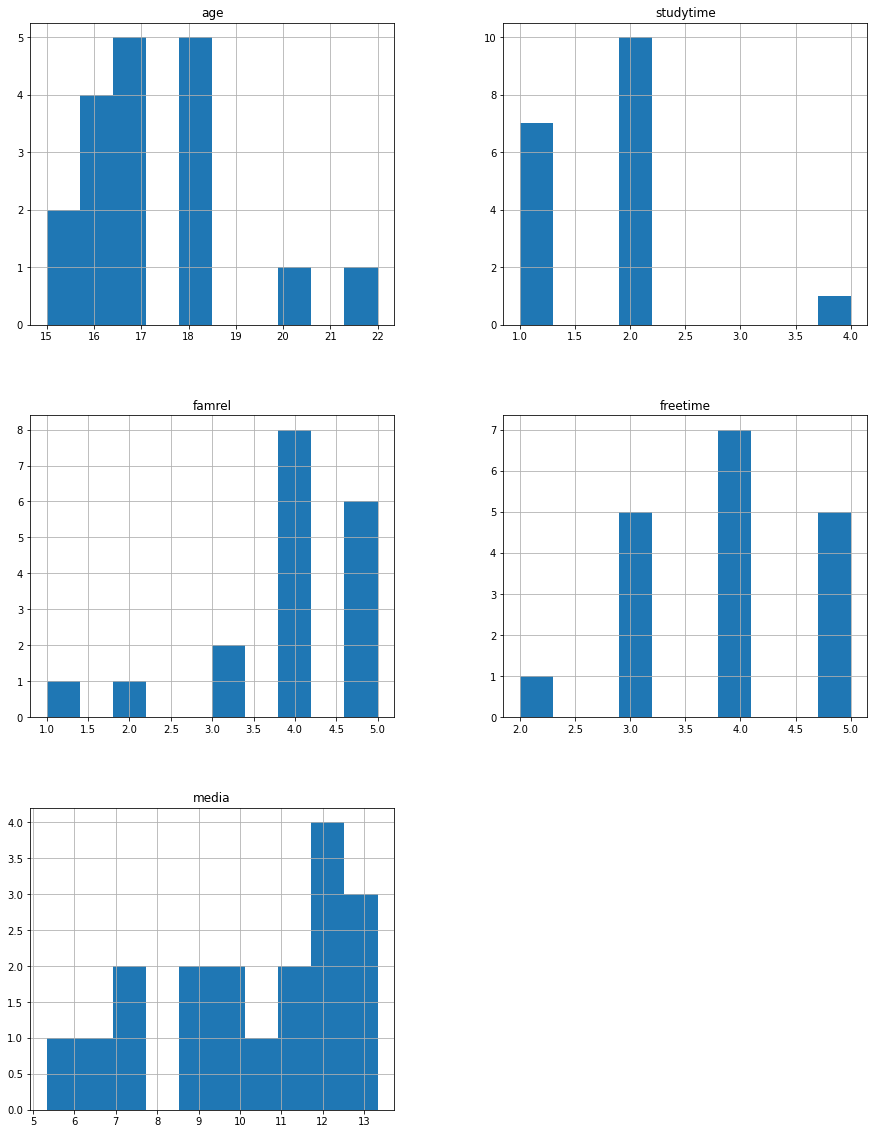

In [117]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
amostra.hist(ax = ax)
plt.show()

In [ ]:
plt.scatter(mat_stud['Dalc'],mat_stud['media'])
plt.show()